In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
import seaborn as sns
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split


In [2]:
df=pd.read_csv("data.csv")

In [14]:
df.head()

,RNASeqCluster,MethylationCluster,miRNACluster,CNCluster,RPPACluster,OncosignCluster,COCCluster,histological_type,neoplasm_histologic_grade,laterality,tumor_location,gender,age_at_initial_pathologic,race,ethnicity,death01
0,2.0,4.0,3.0,2.0,3.0,3.0,2.0,1.0,2.0,3.0,6.0,2.0,48.0,3.0,2.0,0.0
1,2.0,5.0,3.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,53.0,3.0,2.0,0.0
2,1.0,5.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,32.0,3.0,2.0,0.0
3,2.0,5.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,3.0,6.0,1.0,51.0,3.0,2.0,0.0
4,1.0,5.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,37.0,3.0,2.0,0.0


In [3]:
df.drop(['Patient','tumor_tissue_site'],axis=1,inplace=True)

df_train, df_test= train_test_split(df, test_size=0.2)

In [4]:
knn_object=KNNImputer(n_neighbors=1)
df_trf_train=knn_object.fit_transform(df_train)
df_trf_test=knn_object.transform(df_test)

In [5]:
train1=pd.DataFrame(df_trf_train,columns=df_train.columns)
test1=pd.DataFrame(df_trf_test,columns=df_test.columns)

In [6]:
df = pd.DataFrame(train1)
df

,RNASeqCluster,MethylationCluster,miRNACluster,CNCluster,RPPACluster,OncosignCluster,COCCluster,histological_type,neoplasm_histologic_grade,laterality,tumor_location,gender,age_at_initial_pathologic,race,ethnicity,death01
0,2.0,4.0,3.0,2.0,3.0,3.0,2.0,1.0,2.0,3.0,6.0,2.0,48.0,3.0,2.0,0.0
1,2.0,5.0,3.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,53.0,3.0,2.0,0.0
2,1.0,5.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,32.0,3.0,2.0,0.0
3,2.0,5.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,3.0,6.0,1.0,51.0,3.0,2.0,0.0
4,1.0,5.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,37.0,3.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,4.0,3.0,2.0,1.0,2.0,2.0,1.0,3.0,1.0,3.0,2.0,1.0,41.0,3.0,2.0,0.0
84,4.0,2.0,1.0,3.0,4.0,1.0,3.0,3.0,2.0,3.0,2.0,2.0,60.0,3.0,2.0,0.0
85,4.0,5.0,1.0,1.0,4.0,2.0,1.0,2.0,1.0,1.0,6.0,1.0,40.0,3.0,2.0,0.0
86,2.0,5.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,3.0,6.0,2.0,50.0,3.0,2.0,0.0


# Show me the distribution of the curve?

<Axes: ylabel='Density'>

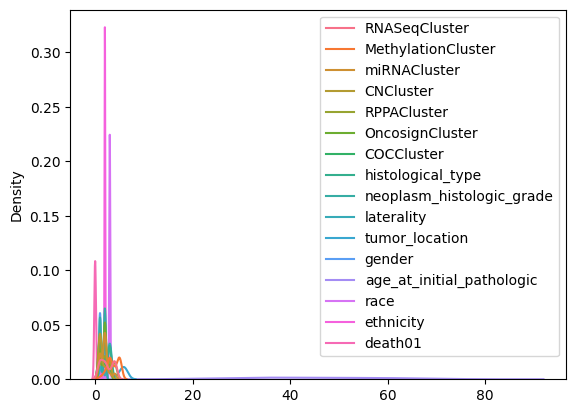

In [7]:
sns.kdeplot(data=df)


<Axes: xlabel='RNASeqCluster', ylabel='Density'>

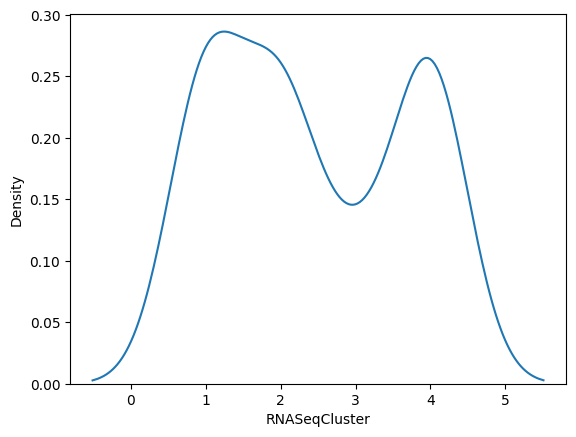

In [8]:
sns.kdeplot(data=df['RNASeqCluster'])

In [10]:
X_train= train1.iloc[:, :-1]
y_train=train1.iloc[:, -1] 
X_test=test1.iloc[:, :-1]
y_test= test1.iloc[:, -1]


In [18]:
X_train_array = np.array(X_train)
X_test_array = np.array(X_test)

In [19]:
X_train_reshaped = X_train_array.reshape(-1, X_train.shape[1], 1)
X_test_reshaped = X_test_array.reshape(-1, X_test.shape[1], 1)

In [43]:
# model = Sequential([
#     GRU(64, input_shape=(X_train.shape[1], 1)),
#     Dense(1, activation='sigmoid')
# ])
model = Sequential([
    GRU(64, input_shape=(X_train.shape[1], 1), return_sequences=True),
    GRU(64),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])



In [44]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])


In [45]:
history = model.fit(X_train_reshaped, y_train, epochs=5, validation_split=0.2)


Epoch 1/5
3/3 [==============================] - 4s 312ms/step - loss: 0.7806 - accuracy: 0.3143 - val_loss: 0.5806 - val_accuracy: 0.8333
Epoch 2/5
3/3 [==============================] - 0s 25ms/step - loss: 0.5983 - accuracy: 0.7429 - val_loss: 0.4737 - val_accuracy: 0.8333
Epoch 3/5
3/3 [==============================] - 0s 23ms/step - loss: 0.5809 - accuracy: 0.7429 - val_loss: 0.4497 - val_accuracy: 0.8333
Epoch 4/5
3/3 [==============================] - 0s 28ms/step - loss: 0.5899 - accuracy: 0.7429 - val_loss: 0.4508 - val_accuracy: 0.8333
Epoch 5/5
3/3 [==============================] - 0s 23ms/step - loss: 0.5841 - accuracy: 0.7429 - val_loss: 0.4605 - val_accuracy: 0.8333


In [46]:
_, accuracy = model.evaluate(X_test_reshaped, y_test)
print('Accuracy: %.2f%%' % (accuracy*100))


1/1 [==============================] - 0s 25ms/step - loss: 0.5974 - accuracy: 0.7273
Accuracy: 72.73%
